In [1]:
import os
os.chdir(os.path.dirname(os.getcwd()))
import json
import time

import pandas as pd
from imblearn.over_sampling import SMOTENC, RandomOverSampler
from imblearn.pipeline import Pipeline as Pipeline_imb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ParameterGrid
from sklearn.tree import DecisionTreeClassifier

from tools import (Modelisation, SearchCV, best_score_CV, datasets,
                   graph_2scores_CV, graph_2scores_CV_comp, graph_3scores_CV,
                   graph_param_CV, restauration_CV, PDF)

pdf = PDF('output/model_decision_tree/')

t = time.time()

In [2]:
df = pd.read_csv('data/df_train_prepro.csv').sample(frac=1)
df.shape

(1610494, 48)

**Définition des variables quantitatives, des variables catégorielles et des datasets :**

In [3]:
datasets_df = datasets(df)
X_quant = datasets_df['X_quant']
X_cat = datasets_df['X_cat']
X = datasets_df['X']
y = datasets_df['y']

Columns_quant : default
Columns_cat : default
drop : if_binary

Nombre de variables pour X_quant : 13



Index(['contextid', 'campaignctrlast24h', 'dayssincelastvisitdouble',
       'ltf_nbglobaldisplay_4w', 'ltf_nbpartnerdisplayssincelastclick',
       'ltf_nbpartnerdisplay_90d', 'ltf_nbpartnerclick_90d',
       'ltf_nbpartnersales_90d', 'nbdayssincelastclick', 'nbdisplay_1hour',
       'nbdisplayglobalapprox_1d_sum_xdevice', 'display_size',
       'zonecostineuro'],
      dtype='object')


Nombre de variables pour X_cat : 56



Index(['display_env_app_android', 'display_env_app_ios', 'display_env_other',
       'display_env_web', 'target_env_2', 'campaignscenario_0',
       'campaignscenario_5', 'campaignscenario_6', 'campaignscenario_11',
       'campaignscenario_12', 'campaignscenario_13', 'campaignscenario_17',
       'campaignvertical_14.0', 'campaignvertical_20.0',
       'campaignvertical_23.0', 'campaignvertical_129.0',
       'campaignvertical_200002.0', 'is_interstitial_True',
       'device_type_Android', 'device_type_Desktop',
       'device_type_Desktop - Safari', 'device_type_Mobile - Other',
       'device_type_Unknown', 'device_type_iPad', 'device_type_iPhone',
       'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6',
       'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'weekday_Friday',
       'weekday_Monday', 'weekday_Satur


Nombre de variables pour X : 69


# Decision tree
## 1. Modèle brut
### 1.1. Variables quantitatives

Export PDF : output/model_decision_tree/00.pdf



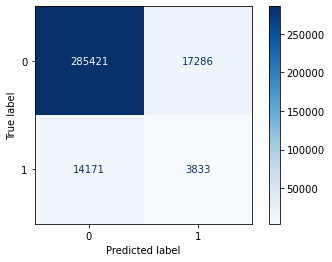

f1 : 0.1959
f3 : 0.2093
f5 : 0.2115
recall : 0.2129
negative predictive value : 0.9527
precision : 0.1815
roc_auc : 0.5779
training time : 16.64s
prediction time : 0.15s


In [4]:
m = Modelisation(X_quant, y, DecisionTreeClassifier())
m.show_conf_matrix(pdf=pdf)
m.show_metrics_score()

Export PDF : output/model_decision_tree/01.pdf



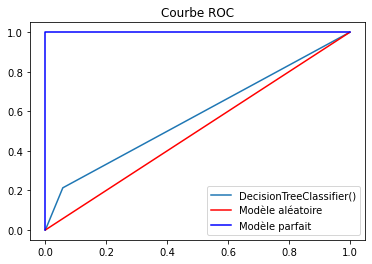

In [5]:
m.show_ROC(pdf=pdf)

In [6]:
m.show_attributes()

max_depth : 57
n_leaves : 92042
node_count : 184083


/home/headless/work/statapp/tools.py:197: RuntimeWarning: invalid value encountered in long_scalars
  Precision = TP / (TP + FP)


Export PDF : output/model_decision_tree/02.pdf



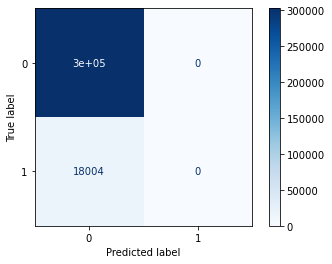

f1 : nan
f3 : nan
f5 : nan
recall : 0.0000
negative predictive value : 0.9439
precision : nan
roc_auc : 0.7375
training time : 1.943s
prediction time : 0.024s


In [7]:
m = Modelisation(X_quant, y, DecisionTreeClassifier(max_depth=2))
m.show_conf_matrix(pdf=pdf)
m.show_metrics_score()

In [8]:
m.show_attributes()

max_depth : 2
n_leaves : 4
node_count : 7


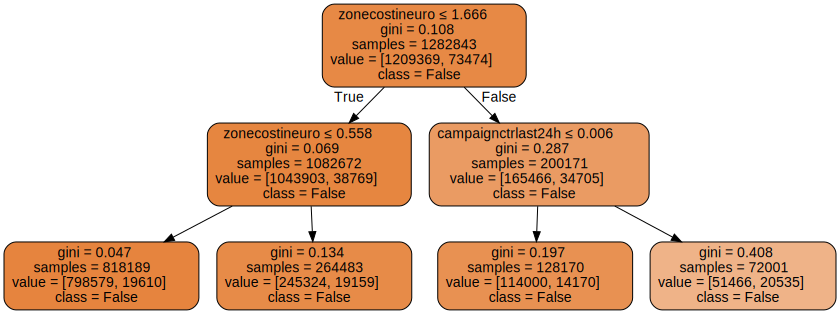

In [9]:
m.plot_tree()

### 1.2. Variables catégorielles

Export PDF : output/model_decision_tree/03.pdf



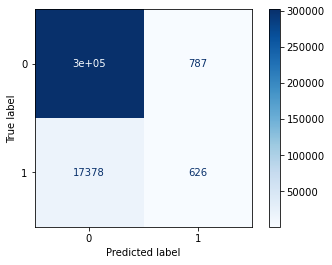

f1 : 0.0645
f3 : 0.0383
f5 : 0.0360
recall : 0.0348
negative predictive value : 0.9456
precision : 0.4430
roc_auc : 0.6579
training time : 11.115s
prediction time : 0.121s


In [10]:
m = Modelisation(X_cat, y, DecisionTreeClassifier())
m.show_conf_matrix(pdf=pdf)
m.show_metrics_score()

In [11]:
m.show_attributes()

max_depth : 46
n_leaves : 18693
node_count : 37385


### 1.3. Variables quantitatives + catégorielles

Export PDF : output/model_decision_tree/04.pdf



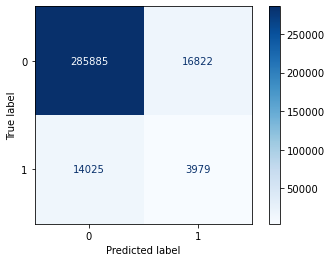

f1 : 0.2051
f3 : 0.2176
f5 : 0.2197
recall : 0.2210
negative predictive value : 0.9532
precision : 0.1913
roc_auc : 0.5827
training time : 31.659s
prediction time : 0.259s


In [12]:
m = Modelisation(X, y, DecisionTreeClassifier())
m.show_conf_matrix(pdf=pdf)
m.show_metrics_score()

In [13]:
m.show_attributes()

max_depth : 57
n_leaves : 87366
node_count : 174731


# Random Forest

## 1. Modèle brut

Export PDF : output/model_decision_tree/05.pdf



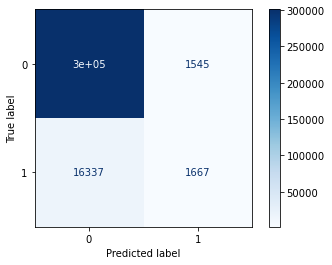

f1 : 0.1571
f3 : 0.1009
f5 : 0.0956
recall : 0.0926
negative predictive value : 0.9485
precision : 0.5190
roc_auc : 0.7377
training time : 5.519s
prediction time : 0.325s


In [14]:
m = Modelisation(X, y, RandomForestClassifier(n_estimators=10, n_jobs=-1))
m.show_conf_matrix(pdf=pdf)
m.show_metrics_score()

Export PDF : output/model_decision_tree/06.pdf



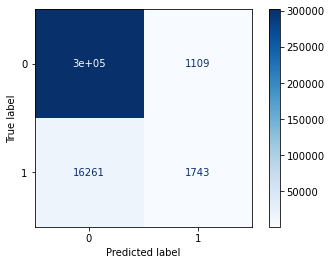

f1 : 0.1671
f3 : 0.1057
f5 : 0.1001
recall : 0.0968
negative predictive value : 0.9488
precision : 0.6112
roc_auc : 0.8144
training time : 26.534s
prediction time : 0.92s


In [15]:
m = Modelisation(X, y, RandomForestClassifier(n_estimators=100, n_jobs=-1))
m.show_conf_matrix(pdf=pdf)
m.show_metrics_score()

Export PDF : output/model_decision_tree/07.pdf



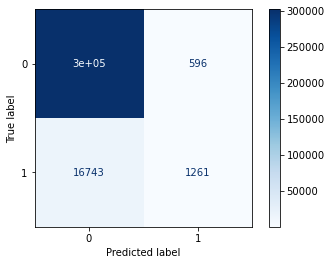

f1 : 0.1270
f3 : 0.0769
f5 : 0.0725
recall : 0.0700
negative predictive value : 0.9475
precision : 0.6791
roc_auc : 0.8354
training time : 27.254s
prediction time : 0.661s


In [16]:
m = Modelisation(X, y, RandomForestClassifier(min_samples_leaf=15, n_estimators=100, n_jobs=-1))
m.show_conf_matrix(pdf=pdf)
m.show_metrics_score()

## 2. Tuning des hyperparamètres avec GridSearchCV

In [17]:
model = RandomForestClassifier()

cv_params = {
    "bootstrap": [False, True],
    "max_depth": [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    "max_features": ['sqrt', 'log2'],
    "min_samples_leaf": [1, 2, 4],
    "min_samples_split": [2, 5, 10],
    "n_estimators": [50, 100, 200, 400, 600, 800, 1000, 1500],
    "class_weight": [None, 'balanced', {0:1, 1:2}, {0:1, 1:4}, {0:1, 1:6}, {0:1, 1:8},
                     {0:1, 1:10}, {0:1, 1:12}, {0:1, 1:14}, {0:1, 1:16}, {0:1, 1:18},
                     {0:1, 1:20}, {0:1, 1:22}, {0:1, 1:24}, {0:1, 1:26}, {0:1, 1:28},
                     {0:1, 1:30}, {0:1, 1:32}] 
}

print(len(ParameterGrid(cv_params)))

57024


In [18]:
# SearchCV(model, cv_params, data_frac=0.02, random=True, n_iter=5000, random_state=1234, n_jobs=35)

In [19]:
dico, results = restauration_CV('Forest_CV_Randomized5000_57024_0.02')

model : RandomForestClassifier()
model_name : Forest
type : RandomizedSearchCV
len_grid : 57024
n_iter : 5000
columns_quant : default
columns_cat : default
drop : if_binary
data_frac : 0.02
n_jobs : 28
temps : 8h, 2min, 10.182s
params : {'bootstrap': [False, True], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None], 'max_features': ['sqrt', 'log2'], 'min_samples_leaf': [1, 2, 4], 'min_samples_split': [2, 5, 10], 'n_estimators': [50, 100, 200, 400, 600, 800, 1000, 1500], 'class_weight': [None, 'balanced', {0: 1, 1: 2}, {0: 1, 1: 4}, {0: 1, 1: 6}, {0: 1, 1: 8}, {0: 1, 1: 10}, {0: 1, 1: 12}, {0: 1, 1: 14}, {0: 1, 1: 16}, {0: 1, 1: 18}, {0: 1, 1: 20}, {0: 1, 1: 22}, {0: 1, 1: 24}, {0: 1, 1: 26}, {0: 1, 1: 28}, {0: 1, 1: 30}, {0: 1, 1: 32}]}
scoring : {'recall': 'recall', 'precision': 'precision', 'f1': 'f1', 'f3': make_scorer(fbeta_score, beta=3), 'f5': make_scorer(fbeta_score, beta=5)}


Export PDF : output/model_decision_tree/08.pdf



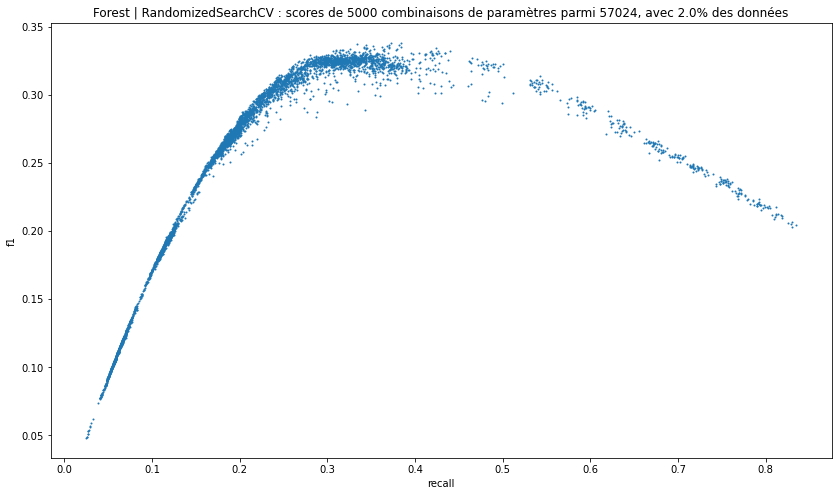

In [20]:
graph_2scores_CV(dico, results, 'recall', 'f1', s=1, pdf=pdf)

Export PDF : output/model_decision_tree/09.pdf



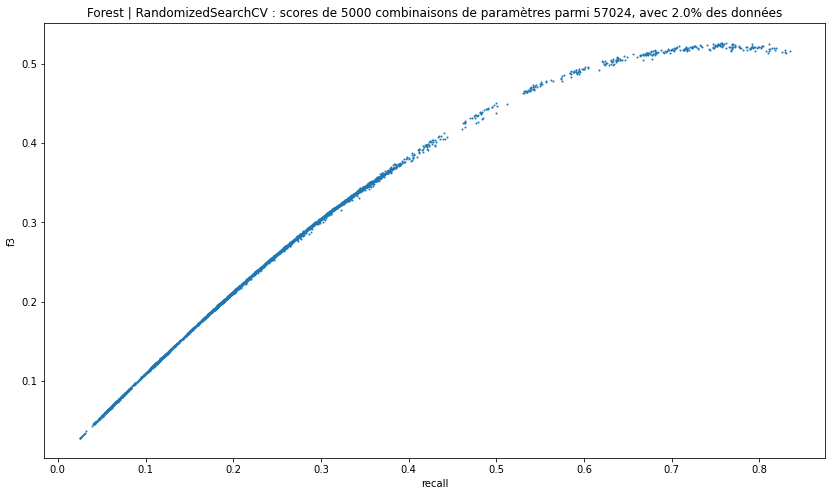

In [21]:
graph_2scores_CV(dico, results, 'recall', 'f3', s=1, pdf=pdf)

Export PDF : output/model_decision_tree/10.pdf



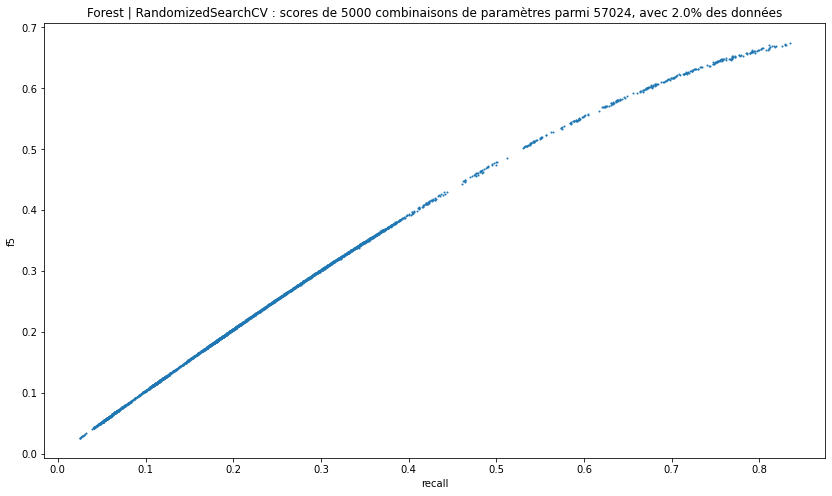

In [22]:
graph_2scores_CV(dico, results, 'recall', 'f5', s=1, pdf=pdf)

Export PDF : output/model_decision_tree/11.pdf



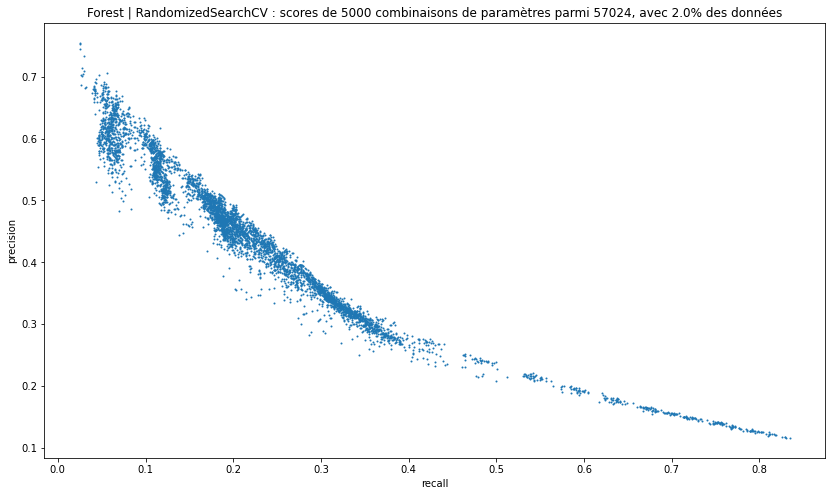

In [23]:
graph_2scores_CV(dico, results, 'recall', 'precision', s=1, pdf=pdf)

Export PDF : output/model_decision_tree/12.pdf



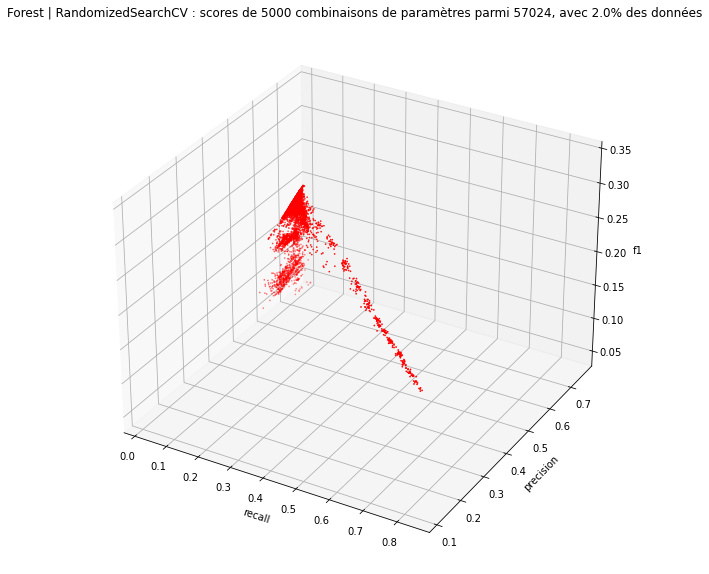

In [24]:
graph_3scores_CV(dico, results, 'recall', 'precision', 'f1', s=0.5, pdf=pdf)

Export PDF : output/model_decision_tree/13.pdf



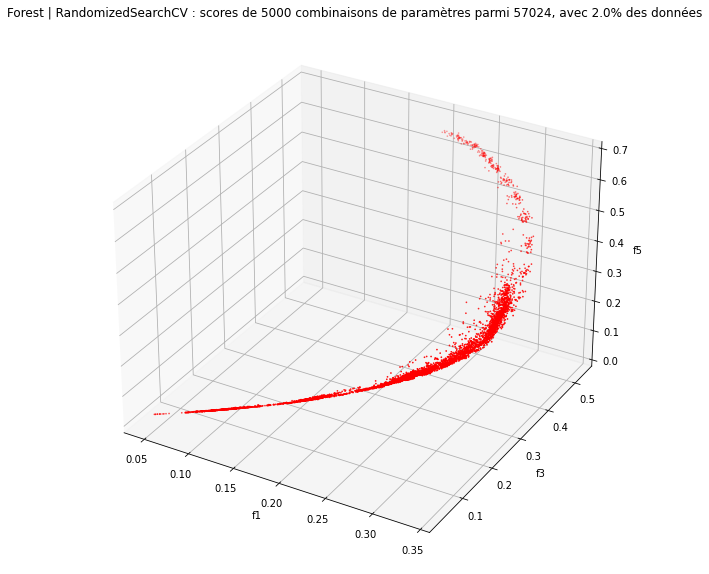

In [25]:
graph_3scores_CV(dico, results, 'f1', 'f3', 'f5', s=0.5, pdf=pdf)

Export PDF : output/model_decision_tree/14.pdf



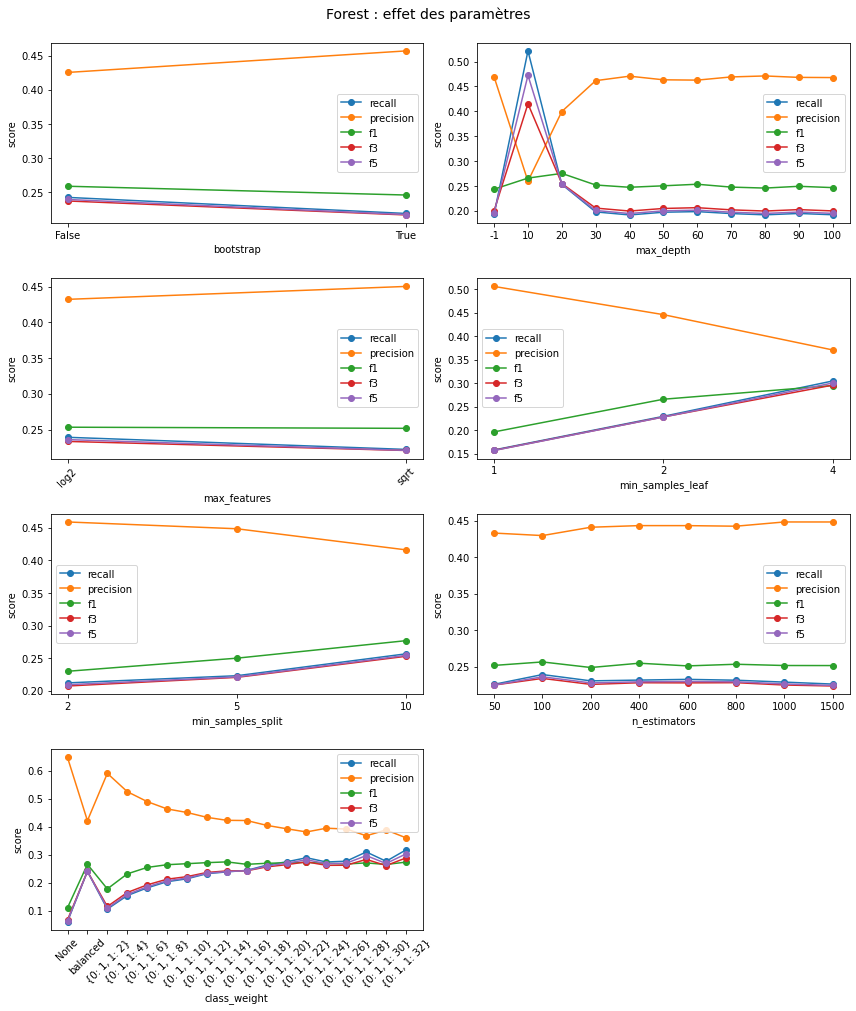

In [26]:
graph_param_CV(dico, results, ncols=2, height=3.5, width=6, pdf=pdf)

In [27]:
best_params = best_score_CV(dico, results, 'f3')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_class_weight,...,rank_test_precision,mean_test_f1,std_test_f1,rank_test_f1,mean_test_f3,std_test_f3,rank_test_f3,mean_test_f5,std_test_f5,rank_test_f5
2232,43.166859,8.159292,1.277046,0.284211,800,10,1,sqrt,10,"{0: 1, 1: 26}",...,4918,0.238166,0.003047,3453,0.526939,0.003473,1,0.647802,0.004159,58
1533,40.709451,2.516572,1.970807,0.105237,1000,2,4,sqrt,10,"{0: 1, 1: 32}",...,4934,0.235739,0.003003,3481,0.526652,0.006201,2,0.650079,0.007792,51
3344,45.54324,6.709797,1.352534,0.21848,1000,2,4,sqrt,10,"{0: 1, 1: 26}",...,4924,0.236948,0.00338,3467,0.52618,0.006651,3,0.647855,0.008355,57
3859,11.303596,2.255403,0.589007,0.143508,400,10,4,log2,10,"{0: 1, 1: 28}",...,4936,0.23505,0.00448,3489,0.525121,0.00876,4,0.648207,0.010809,56
1448,56.003621,3.227495,2.388133,0.447929,1500,10,4,sqrt,10,"{0: 1, 1: 30}",...,4916,0.239735,0.003192,3439,0.525093,0.006824,5,0.642814,0.008543,77
3416,36.624873,6.71249,1.013457,0.086323,800,10,2,sqrt,10,"{0: 1, 1: 26}",...,4920,0.237497,0.002661,3462,0.525046,0.005223,6,0.645243,0.006526,69
3619,9.324254,1.694134,0.282392,0.063798,200,10,2,sqrt,10,"{0: 1, 1: 26}",...,4919,0.23769,0.003864,3460,0.525017,0.006717,7,0.644979,0.007828,70
2682,17.24144,0.924474,0.539476,0.126815,400,2,1,sqrt,10,"{0: 1, 1: 28}",...,4944,0.23149,0.003894,3522,0.524996,0.00571,8,0.652238,0.005699,45
2611,30.737333,5.27216,0.990793,0.214175,600,2,4,sqrt,10,"{0: 1, 1: 26}",...,4925,0.236769,0.002821,3471,0.524958,0.004078,9,0.645923,0.004402,65
2597,9.279645,1.716058,0.317646,0.087973,200,5,4,sqrt,10,"{0: 1, 1: 32}",...,4983,0.217534,0.004848,3611,0.524837,0.00891,10,0.670603,0.01012,5


Meilleure combinaison de paramètres pour f3 :


{'n_estimators': 800,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 10,
 'class_weight': {0: 1, 1: 26},
 'bootstrap': False}

In [28]:
best_params['n_jobs'] = -1
best_params['n_estimators'] = 400
PARAMS = {}
PARAMS[dico['model_name']] = best_params

Export PDF : output/model_decision_tree/15.pdf



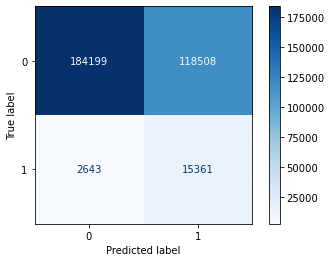

f1 : 0.2023
f3 : 0.5191
f5 : 0.6839
recall : 0.8532
negative predictive value : 0.9859
precision : 0.1147
roc_auc : 0.8255
training time : 1min, 29.551s
prediction time : 1.036s


In [29]:
m = Modelisation(X, y, RandomForestClassifier(**best_params))
m.show_conf_matrix(pdf=pdf)
m.show_metrics_score()

SCORES = []
metrics = m.metrics_score
metrics['model_name'] = dico['model_name']
metrics['training_time'] = m.training_time
metrics['prediction_time'] = m.prediction_time
SCORES.append(metrics)

## 3. RandomForest avec oversampling

### 3.1. GridSearchCV avec RandomOverSampler

In [30]:
over = RandomOverSampler(random_state=1234)

pipeline = Pipeline_imb([('over', over),
                         ('model', RandomForestClassifier())
                         ])

cv_params = {
    "over__sampling_strategy": [0.1, 0.2, 0.4, 0.6, 0.8, 1],
    "model__bootstrap": [False, True],
    "model__max_depth": [10, 20, 30, 40, 50, None],
    "model__max_features": ['sqrt', 'log2'],
    "model__min_samples_leaf": [1, 2, 4],
    "model__min_samples_split": [2, 5, 10],
    "model__n_estimators": [50, 100, 200, 400, 600, 800, 1000],
    "model__class_weight": [None, 'balanced', {0:1, 1:2}, {0:1, 1:4}, {0:1, 1:8}, {0:1, 1:12}, 
                            {0:1, 1:16}, {0:1, 1:18}, {0:1, 1:20}, {0:1, 1:22}, {0:1, 1:24}, 
                            {0:1, 1:26}, {0:1, 1:28}, {0:1, 1:30}, {0:1, 1:32}] 
}

print(len(ParameterGrid(cv_params)))

136080


In [31]:
# SearchCV(pipeline, cv_params, data_frac=0.02, random=True, n_iter=10000, random_state=1234, n_jobs=35)

In [32]:
dico, results = restauration_CV('RandomOver_Forest_CV_Randomized10000_136080_0.02')

model : Pipeline(steps=[('over', RandomOverSampler(random_state=1234)),
                ('model', RandomForestClassifier())])
model_name : RandomOver_Forest
type : RandomizedSearchCV
len_grid : 136080
n_iter : 10000
columns_quant : default
columns_cat : default
drop : if_binary
data_frac : 0.02
n_jobs : 28
temps : 18h, 21min, 50.539s
params : {'over__sampling_strategy': [0.1, 0.2, 0.4, 0.6, 0.8, 1], 'model__bootstrap': [False, True], 'model__max_depth': [10, 20, 30, 40, 50, None], 'model__max_features': ['sqrt', 'log2'], 'model__min_samples_leaf': [1, 2, 4], 'model__min_samples_split': [2, 5, 10], 'model__n_estimators': [50, 100, 200, 400, 600, 800, 1000], 'model__class_weight': [None, 'balanced', {0: 1, 1: 2}, {0: 1, 1: 4}, {0: 1, 1: 8}, {0: 1, 1: 12}, {0: 1, 1: 16}, {0: 1, 1: 18}, {0: 1, 1: 20}, {0: 1, 1: 22}, {0: 1, 1: 24}, {0: 1, 1: 26}, {0: 1, 1: 28}, {0: 1, 1: 30}, {0: 1, 1: 32}]}
scoring : {'recall': 'recall', 'precision': 'precision', 'f1': 'f1', 'f3': make_scorer(fbeta_score, 

Export PDF : output/model_decision_tree/16.pdf



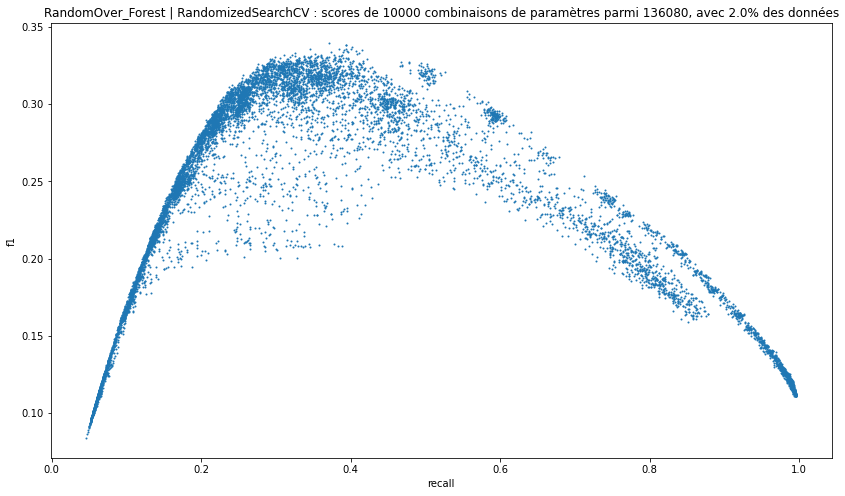

In [33]:
graph_2scores_CV(dico, results, 'recall', 'f1', s=1, pdf=pdf)

Export PDF : output/model_decision_tree/17.pdf



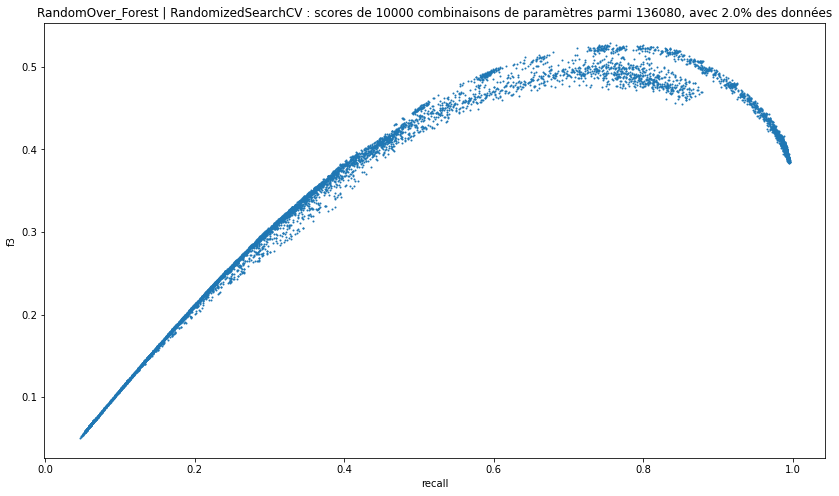

In [34]:
graph_2scores_CV(dico, results, 'recall', 'f3', s=1, pdf=pdf)

Export PDF : output/model_decision_tree/18.pdf



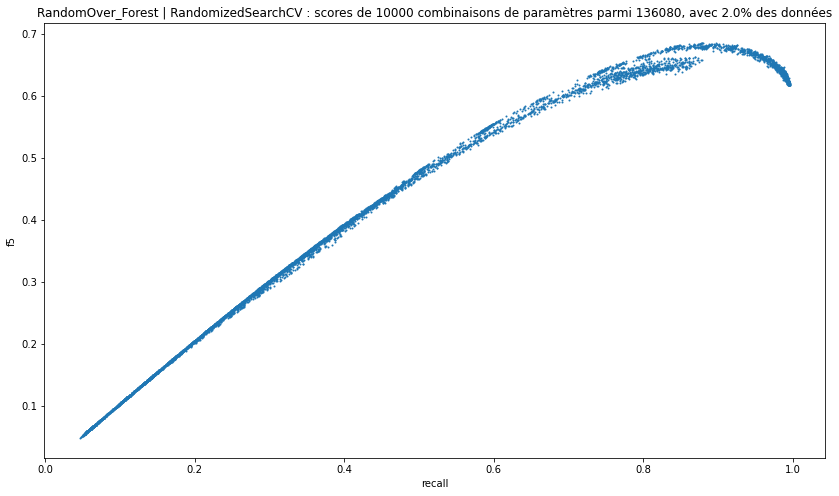

In [35]:
graph_2scores_CV(dico, results, 'recall', 'f5', s=1, pdf=pdf)

Export PDF : output/model_decision_tree/19.pdf



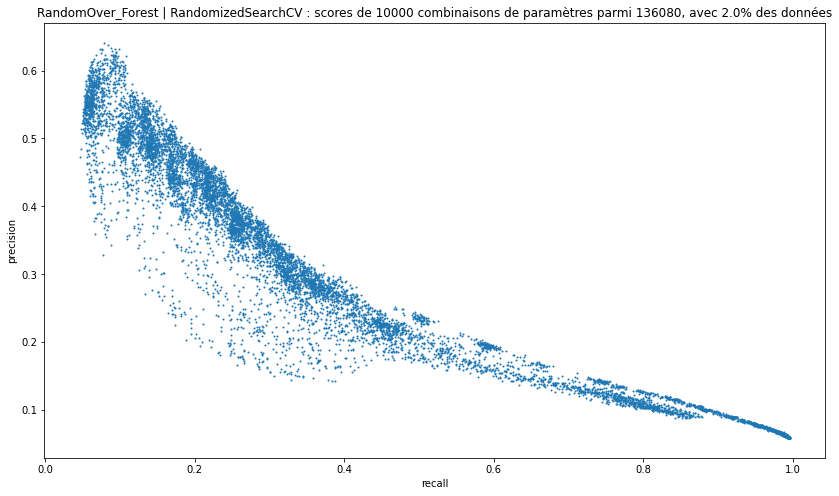

In [36]:
graph_2scores_CV(dico, results, 'recall', 'precision', s=1, pdf=pdf)

Export PDF : output/model_decision_tree/20.pdf



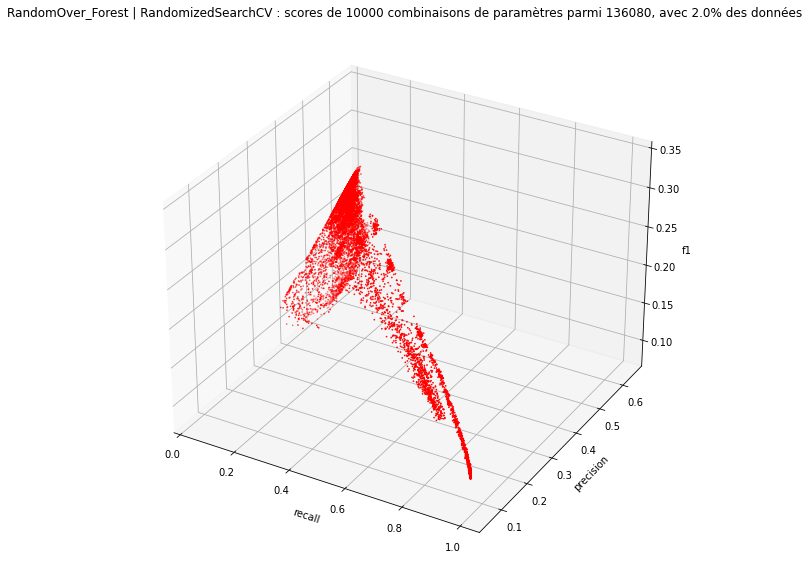

In [37]:
graph_3scores_CV(dico, results, 'recall', 'precision', 'f1', s=0.5, pdf=pdf)

Export PDF : output/model_decision_tree/21.pdf



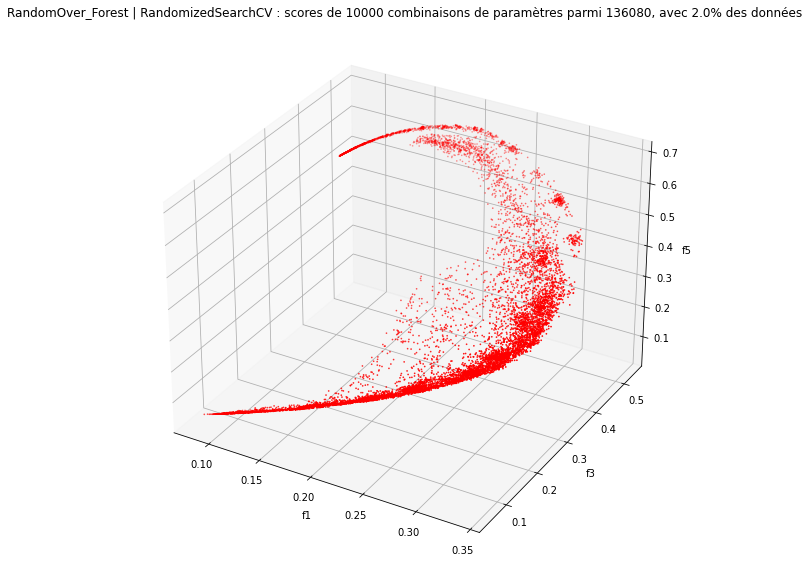

In [38]:
graph_3scores_CV(dico, results, 'f1', 'f3', 'f5', s=0.5, pdf=pdf)

Export PDF : output/model_decision_tree/22.pdf



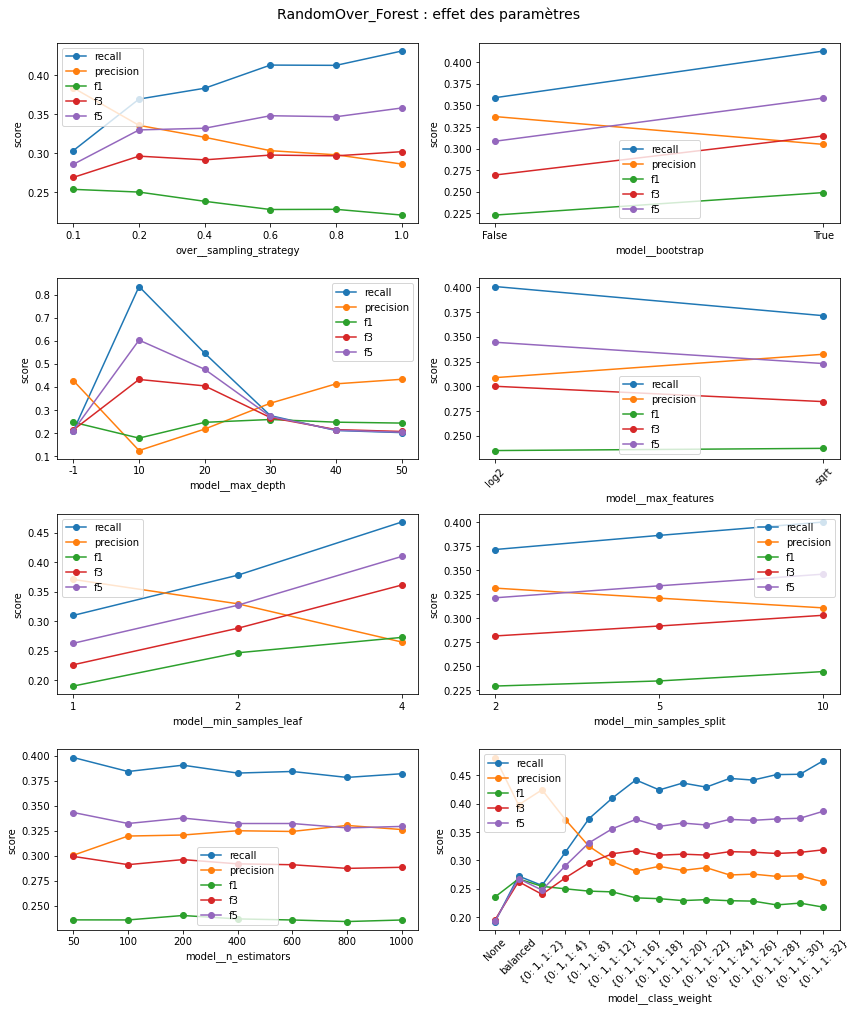

In [39]:
graph_param_CV(dico, results, ncols=2, height=3.5, width=6, pdf=pdf)

In [40]:
best_params = best_score_CV(dico, results, 'f3')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_over__sampling_strategy,param_model__n_estimators,param_model__min_samples_split,param_model__min_samples_leaf,param_model__max_features,param_model__max_depth,...,rank_test_precision,mean_test_f1,std_test_f1,rank_test_f1,mean_test_f3,std_test_f3,rank_test_f3,mean_test_f5,std_test_f5,rank_test_f5
979,40.147479,0.559979,1.016336,0.047531,0.8,800,10,1,sqrt,10,...,7976,0.240481,0.00311,5382,0.528983,0.003032,1,0.648745,0.003234,743
7147,2.611673,0.443385,0.091172,0.017463,0.1,50,2,1,sqrt,10,...,7928,0.244158,0.004054,5237,0.526449,0.008678,2,0.640364,0.010936,1079
7574,36.093642,2.970123,1.260169,0.071785,0.1,1000,5,1,log2,10,...,8045,0.234425,0.00409,5601,0.526147,0.007961,3,0.65075,0.009859,678
5656,13.344011,1.678417,0.616193,0.096173,0.1,400,10,4,sqrt,10,...,7978,0.240072,0.002896,5400,0.52606,0.005755,4,0.644111,0.006942,933
7053,3.708672,0.731459,0.178202,0.038823,0.1,100,10,4,sqrt,10,...,7993,0.239147,0.003546,5444,0.525974,0.005895,5,0.645036,0.008226,883
5694,27.131808,2.541683,1.203881,0.256135,0.1,800,2,4,sqrt,10,...,8174,0.221826,0.003904,5998,0.525698,0.008388,6,0.666092,0.010709,399
5629,4.869185,0.968937,0.179243,0.042849,0.4,100,2,4,sqrt,10,...,8003,0.238287,0.004056,5483,0.525572,0.005701,7,0.645292,0.006564,866
2885,32.44277,5.127634,0.74964,0.059857,0.8,600,2,4,sqrt,10,...,8009,0.237758,0.003838,5505,0.525499,0.006252,8,0.645749,0.007297,842
7199,11.367632,1.56311,0.324566,0.057743,0.8,200,2,2,sqrt,10,...,8001,0.238327,0.00409,5481,0.525221,0.007033,9,0.644609,0.007799,909
2305,10.131406,1.99771,0.328757,0.070222,0.1,200,2,2,sqrt,10,...,7948,0.242547,0.003482,5293,0.525168,0.006888,10,0.639886,0.00848,1092


Meilleure combinaison de paramètres pour f3 :


{'over__sampling_strategy': 0.8,
 'model__n_estimators': 800,
 'model__min_samples_split': 10,
 'model__min_samples_leaf': 1,
 'model__max_features': 'sqrt',
 'model__max_depth': 10,
 'model__class_weight': {0: 1, 1: 2},
 'model__bootstrap': True}

In [41]:
best_params['model__n_jobs'] = -1
best_params['model__n_estimators'] = 400
PARAMS[dico['model_name']] = best_params

Export PDF : output/model_decision_tree/23.pdf



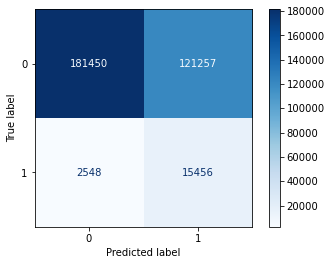

f1 : 0.1998
f3 : 0.5174
f5 : 0.6848
recall : 0.8585
negative predictive value : 0.9862
precision : 0.1131
roc_auc : 0.8249
training time : 2min, 3.846s
prediction time : 1.131s


In [42]:
m = Modelisation(X, y, pipeline.set_params(**best_params))
m.show_conf_matrix(pdf=pdf)
m.show_metrics_score()

metrics = m.metrics_score
metrics['model_name'] = dico['model_name']
metrics['training_time'] = m.training_time
metrics['prediction_time'] = m.prediction_time
SCORES.append(metrics)

### 3.2. GridSearchCV avec SMOTENC

### 3.3. Comparaison

In [43]:
dr1 = restauration_CV('Forest_CV_Randomized5000_57024_0.02', verbose=False)
dr2 = restauration_CV('RandomOver_Forest_CV_Randomized10000_136080_0.02', verbose=False)

Export PDF : output/model_decision_tree/24.pdf



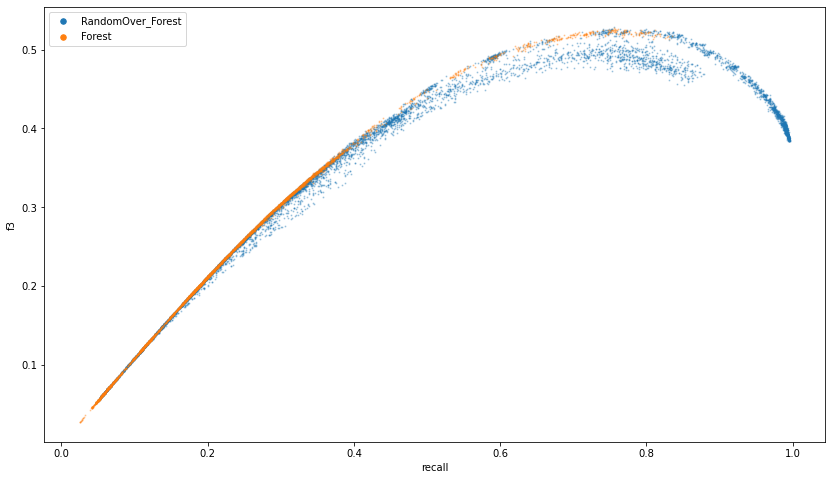

In [44]:
graph_2scores_CV_comp([dr2, dr1], 'recall', 'f3', s=[1, 1], alpha=0.3, pdf=pdf)

Export PDF : output/model_decision_tree/25.pdf



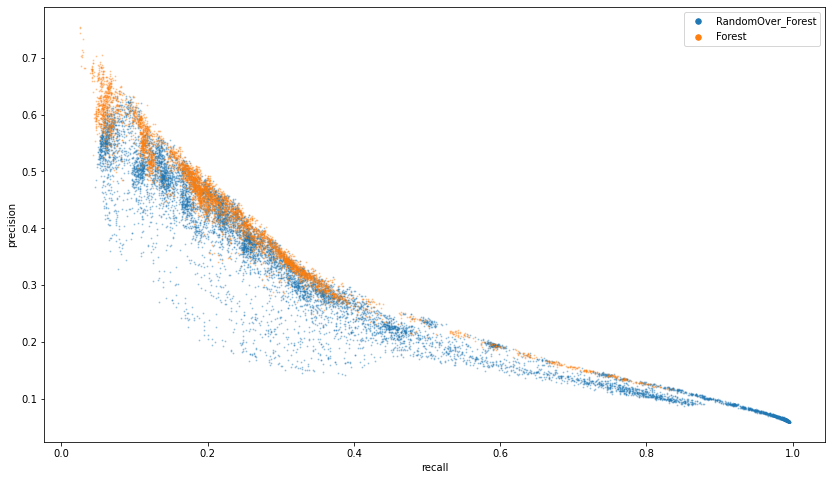

In [45]:
graph_2scores_CV_comp([dr2, dr1], 'recall', 'precision', s=[1, 1], alpha=0.3, pdf=pdf)

## 4. RandomForest avec RFECV
### 4.1. Sans oversampling

In [46]:
with open("backups/RFECV_Forest.json", 'r') as f:
    export = json.load(f)
    columns_quant_RFECV = export['columns_quant']
    columns_cat_RFECV = export['columns_cat']

In [47]:
model = RandomForestClassifier()

cv_params = {
    "bootstrap": [False, True],
    "max_depth": [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    "max_features": ['sqrt', 'log2'],
    "min_samples_leaf": [1, 2, 4],
    "min_samples_split": [2, 5, 10],
    "n_estimators": [50, 100, 200, 400, 600, 800, 1000, 1500],
    "class_weight": [None, 'balanced', {0:1, 1:2}, {0:1, 1:4}, {0:1, 1:6}, {0:1, 1:8},
                     {0:1, 1:10}, {0:1, 1:12}, {0:1, 1:14}, {0:1, 1:16}, {0:1, 1:18},
                     {0:1, 1:20}, {0:1, 1:22}, {0:1, 1:24}, {0:1, 1:26}, {0:1, 1:28},
                     {0:1, 1:30}, {0:1, 1:32}] 
}

print(len(ParameterGrid(cv_params)))

57024


In [48]:
# SearchCV(model, cv_params, columns_quant=columns_quant_RFECV, columns_cat=columns_cat_RFECV, data_frac=0.02, random=True, n_iter=5000, random_state=1234, n_jobs=35, name='RFECV')

In [49]:
dico, results = restauration_CV('Forest_RFECV_CV_Randomized5000_57024_0.02')

model : RandomForestClassifier()
model_name : Forest_RFECV
type : RandomizedSearchCV
len_grid : 57024
n_iter : 5000
columns_quant : ['campaignctrlast24h', 'contextid', 'dayssincelastvisitdouble', 'display_size', 'nbdayssincelastclick', 'nbdisplay_1hour', 'nbdisplayglobalapprox_1d_sum_xdevice', 'zonecostineuro']
columns_cat : ['is_interstitial_True']
drop : if_binary
data_frac : 0.02
n_jobs : 28
temps : 8h, 24min, 15.284s
params : {'bootstrap': [False, True], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None], 'max_features': ['sqrt', 'log2'], 'min_samples_leaf': [1, 2, 4], 'min_samples_split': [2, 5, 10], 'n_estimators': [50, 100, 200, 400, 600, 800, 1000, 1500], 'class_weight': [None, 'balanced', {0: 1, 1: 2}, {0: 1, 1: 4}, {0: 1, 1: 6}, {0: 1, 1: 8}, {0: 1, 1: 10}, {0: 1, 1: 12}, {0: 1, 1: 14}, {0: 1, 1: 16}, {0: 1, 1: 18}, {0: 1, 1: 20}, {0: 1, 1: 22}, {0: 1, 1: 24}, {0: 1, 1: 26}, {0: 1, 1: 28}, {0: 1, 1: 30}, {0: 1, 1: 32}]}
scoring : {'recall': 'recall', 'precision': 'p

In [50]:
best_params = best_score_CV(dico, results, 'f3', display_table=False)

Meilleure combinaison de paramètres pour f3 :


{'n_estimators': 400,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 10,
 'class_weight': {0: 1, 1: 32},
 'bootstrap': False}

In [51]:
best_params['n_jobs'] = -1
best_params['n_estimators'] = 400
PARAMS[dico['model_name']] = best_params

In [52]:
datasets_df_RFECV = datasets(df, columns_quant=columns_quant_RFECV, columns_cat=columns_cat_RFECV)
X_RFECV = datasets_df_RFECV['X']

Columns_quant : ['campaignctrlast24h', 'contextid', 'dayssincelastvisitdouble', 'display_size', 'nbdayssincelastclick', 'nbdisplay_1hour', 'nbdisplayglobalapprox_1d_sum_xdevice', 'zonecostineuro']
Columns_cat : ['is_interstitial_True']
drop : if_binary

Nombre de variables pour X_quant : 8



Index(['campaignctrlast24h', 'contextid', 'dayssincelastvisitdouble',
       'display_size', 'nbdayssincelastclick', 'nbdisplay_1hour',
       'nbdisplayglobalapprox_1d_sum_xdevice', 'zonecostineuro'],
      dtype='object')


Nombre de variables pour X_cat : 1



Index(['is_interstitial_True'], dtype='object')


Nombre de variables pour X : 9


Export PDF : output/model_decision_tree/26.pdf



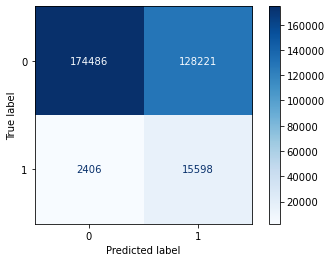

f1 : 0.1928
f3 : 0.5100
f5 : 0.6828
recall : 0.8664
negative predictive value : 0.9864
precision : 0.1085
roc_auc : 0.8272
training time : 1min, 7.215s
prediction time : 0.807s


In [53]:
m = Modelisation(X_RFECV, y, RandomForestClassifier(**best_params))
m.show_conf_matrix(pdf=pdf)
m.show_metrics_score()

metrics = m.metrics_score
metrics['model_name'] = dico['model_name']
metrics['training_time'] = m.training_time
metrics['prediction_time'] = m.prediction_time
SCORES.append(metrics)

### 4.2. Avec oversampling (RandomOverSampler)

In [54]:
over = RandomOverSampler(random_state=1234)

pipeline = Pipeline_imb([('over', over),
                         ('model', RandomForestClassifier())
                         ])

cv_params = {
    "over__sampling_strategy": [0.1, 0.2, 0.4, 0.6, 0.8, 1],
    "model__bootstrap": [False, True],
    "model__max_depth": [10, 20, 30, 40, 50, None],
    "model__max_features": ['sqrt', 'log2'],
    "model__min_samples_leaf": [1, 2, 4],
    "model__min_samples_split": [2, 5, 10],
    "model__n_estimators": [50, 100, 200, 400, 600, 800, 1000],
    "model__class_weight": [None, 'balanced', {0:1, 1:2}, {0:1, 1:4}, {0:1, 1:8}, {0:1, 1:12}, 
                            {0:1, 1:16}, {0:1, 1:18}, {0:1, 1:20}, {0:1, 1:22}, {0:1, 1:24}, 
                            {0:1, 1:26}, {0:1, 1:28}, {0:1, 1:30}, {0:1, 1:32}] 
}

print(len(ParameterGrid(cv_params)))

136080


In [55]:
# SearchCV(pipeline, cv_params, columns_quant=columns_quant_RFECV, columns_cat=columns_cat_RFECV, data_frac=0.02, random=True, n_iter=10000, random_state=1234, n_jobs=35, name='RFECV')

In [56]:
dico, results = restauration_CV('RandomOver_Forest_RFECV_CV_Randomized10000_136080_0.02')

model : Pipeline(steps=[('over', RandomOverSampler(random_state=1234)),
                ('model', RandomForestClassifier())])
model_name : RandomOver_Forest_RFECV
type : RandomizedSearchCV
len_grid : 136080
n_iter : 10000
columns_quant : ['campaignctrlast24h', 'contextid', 'dayssincelastvisitdouble', 'display_size', 'nbdayssincelastclick', 'nbdisplay_1hour', 'nbdisplayglobalapprox_1d_sum_xdevice', 'zonecostineuro']
columns_cat : ['is_interstitial_True']
drop : if_binary
data_frac : 0.02
n_jobs : 28
temps : 20h, 50min, 50.531s
params : {'over__sampling_strategy': [0.1, 0.2, 0.4, 0.6, 0.8, 1], 'model__bootstrap': [False, True], 'model__max_depth': [10, 20, 30, 40, 50, None], 'model__max_features': ['sqrt', 'log2'], 'model__min_samples_leaf': [1, 2, 4], 'model__min_samples_split': [2, 5, 10], 'model__n_estimators': [50, 100, 200, 400, 600, 800, 1000], 'model__class_weight': [None, 'balanced', {0: 1, 1: 2}, {0: 1, 1: 4}, {0: 1, 1: 8}, {0: 1, 1: 12}, {0: 1, 1: 16}, {0: 1, 1: 18}, {0: 1, 1: 

In [57]:
best_params = best_score_CV(dico, results, 'f3', display_table=False)

Meilleure combinaison de paramètres pour f3 :


{'over__sampling_strategy': 1,
 'model__n_estimators': 1000,
 'model__min_samples_split': 5,
 'model__min_samples_leaf': 4,
 'model__max_features': 'sqrt',
 'model__max_depth': 10,
 'model__class_weight': {0: 1, 1: 2},
 'model__bootstrap': True}

In [58]:
best_params['model__n_jobs'] = -1
best_params['model__n_estimators'] = 400
PARAMS[dico['model_name']] = best_params

Export PDF : output/model_decision_tree/27.pdf



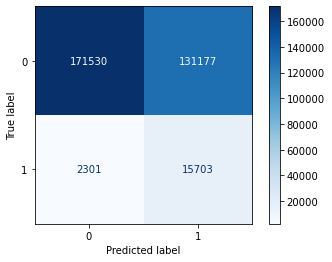

f1 : 0.1905
f3 : 0.5083
f5 : 0.6839
recall : 0.8722
negative predictive value : 0.9868
precision : 0.1069
roc_auc : 0.8274
training time : 1min, 37.606s
prediction time : 0.891s


In [59]:
m = Modelisation(X_RFECV, y, pipeline.set_params(**best_params))
m.show_conf_matrix(pdf=pdf)
m.show_metrics_score()

metrics = m.metrics_score
metrics['model_name'] = dico['model_name']
metrics['training_time'] = m.training_time
metrics['prediction_time'] = m.prediction_time
SCORES.append(metrics)

### 4.3. Avec oversampling (SMOTENC)

In [60]:
categorical_features = list(range(len(columns_quant_RFECV), len(columns_quant_RFECV) + len(columns_cat_RFECV)))
print(categorical_features)

over = SMOTENC(categorical_features=categorical_features,
               random_state=1234)

pipeline = Pipeline_imb([('over', over),
                         ('model', RandomForestClassifier())
                         ])

cv_params = {
    "over__sampling_strategy": [0.1, 0.2, 0.4, 0.6, 0.8, 1],
    "model__bootstrap": [False, True],
    "model__max_depth": [10, 20, 30, 40, 50, None],
    "model__max_features": ['sqrt', 'log2'],
    "model__min_samples_leaf": [1, 2, 4],
    "model__min_samples_split": [2, 5, 10],
    "model__n_estimators": [50, 100, 200, 400, 600, 800, 1000],
    "model__class_weight": [None, 'balanced', {0:1, 1:2}, {0:1, 1:4}, {0:1, 1:8}, {0:1, 1:12}, 
                            {0:1, 1:16}, {0:1, 1:18}, {0:1, 1:20}, {0:1, 1:22}, {0:1, 1:24}, 
                            {0:1, 1:26}, {0:1, 1:28}, {0:1, 1:30}, {0:1, 1:32}] 
}

print(len(ParameterGrid(cv_params)))

[8]
136080


In [61]:
# SearchCV(pipeline, cv_params, columns_quant=columns_quant_RFECV, columns_cat=columns_cat_RFECV, data_frac=0.02, random=True, n_iter=10000, random_state=1234, n_jobs=35, name='RFECV')

In [62]:
dico, results = restauration_CV('SMOTENC_Forest_RFECV_CV_Randomized10000_136080_0.02')

model : Pipeline(steps=[('over', SMOTENC(categorical_features=[8], random_state=1234)),
                ('model', RandomForestClassifier())])
model_name : SMOTENC_Forest_RFECV
type : RandomizedSearchCV
len_grid : 136080
n_iter : 10000
columns_quant : ['campaignctrlast24h', 'contextid', 'dayssincelastvisitdouble', 'display_size', 'nbdayssincelastclick', 'nbdisplay_1hour', 'nbdisplayglobalapprox_1d_sum_xdevice', 'zonecostineuro']
columns_cat : ['is_interstitial_True']
drop : if_binary
data_frac : 0.02
n_jobs : 35
temps : 21h, 2min, 49.544s
params : {'over__sampling_strategy': [0.1, 0.2, 0.4, 0.6, 0.8, 1], 'model__bootstrap': [False, True], 'model__max_depth': [10, 20, 30, 40, 50, None], 'model__max_features': ['sqrt', 'log2'], 'model__min_samples_leaf': [1, 2, 4], 'model__min_samples_split': [2, 5, 10], 'model__n_estimators': [50, 100, 200, 400, 600, 800, 1000], 'model__class_weight': [None, 'balanced', {0: 1, 1: 2}, {0: 1, 1: 4}, {0: 1, 1: 8}, {0: 1, 1: 12}, {0: 1, 1: 16}, {0: 1, 1: 18}

In [63]:
best_params = best_score_CV(dico, results, 'f3', display_table=False)

Meilleure combinaison de paramètres pour f3 :


{'over__sampling_strategy': 0.1,
 'model__n_estimators': 1000,
 'model__min_samples_split': 5,
 'model__min_samples_leaf': 4,
 'model__max_features': 'sqrt',
 'model__max_depth': 10,
 'model__class_weight': {0: 1, 1: 24},
 'model__bootstrap': True}

In [64]:
best_params['over__n_jobs'] = -1
best_params['model__n_jobs'] = -1
best_params['model__n_estimators'] = 400
PARAMS[dico['model_name']] = best_params
with open("backups/PARAMS_Forest.json", 'w') as f:
    json.dump(PARAMS, f, indent=2)

Export PDF : output/model_decision_tree/28.pdf



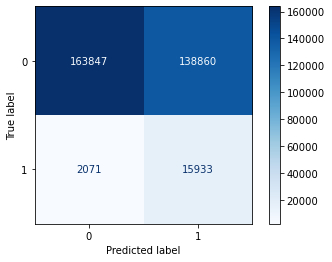

f1 : 0.1844
f3 : 0.5029
f5 : 0.6848
recall : 0.8850
negative predictive value : 0.9875
precision : 0.1029
roc_auc : 0.8259
training time : 4min, 56.631s
prediction time : 0.773s


In [65]:
m = Modelisation(X_RFECV, y, pipeline.set_params(**best_params))
m.show_conf_matrix(pdf=pdf)
m.show_metrics_score()

metrics = m.metrics_score
metrics['model_name'] = dico['model_name']
metrics['training_time'] = m.training_time
metrics['prediction_time'] = m.prediction_time
SCORES.append(metrics)

### 4.4. Comparaison

In [66]:
dr1 = restauration_CV('Forest_CV_Randomized5000_57024_0.02', verbose=False)
dr2 = restauration_CV('Forest_RFECV_CV_Randomized5000_57024_0.02', verbose=False)
dr3 = restauration_CV('RandomOver_Forest_CV_Randomized10000_136080_0.02', verbose=False)
dr4 = restauration_CV('RandomOver_Forest_RFECV_CV_Randomized10000_136080_0.02', verbose=False)
dr5 = restauration_CV('SMOTENC_Forest_RFECV_CV_Randomized10000_136080_0.02', verbose=False)

Export PDF : output/model_decision_tree/29.pdf



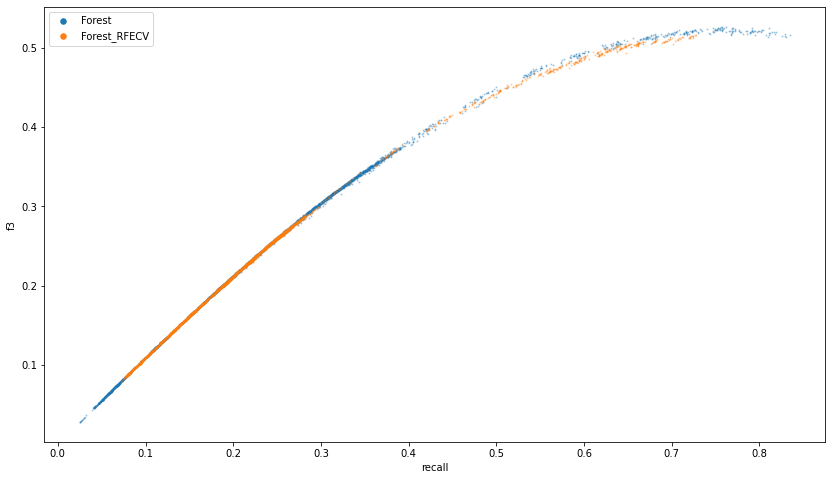

In [67]:
graph_2scores_CV_comp([dr1, dr2], 'recall', 'f3', s=[1, 1], alpha=0.3, pdf=pdf)

Export PDF : output/model_decision_tree/30.pdf



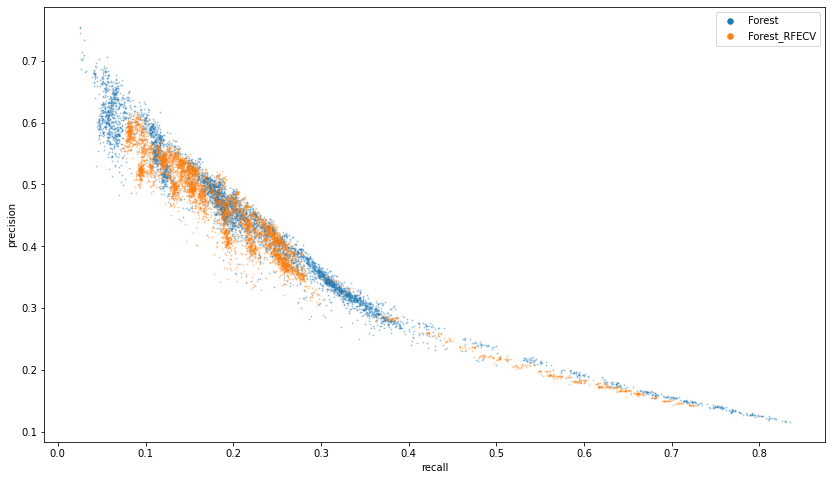

In [68]:
graph_2scores_CV_comp([dr1, dr2], 'recall', 'precision', s=[1, 1], alpha=0.3, pdf=pdf)

Export PDF : output/model_decision_tree/31.pdf



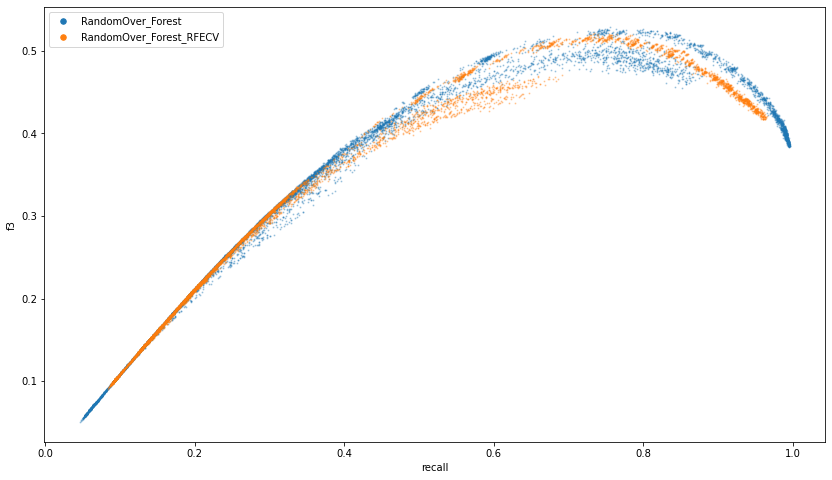

In [69]:
graph_2scores_CV_comp([dr3, dr4], 'recall', 'f3', s=[1, 1], alpha=0.3, pdf=pdf)

Export PDF : output/model_decision_tree/32.pdf



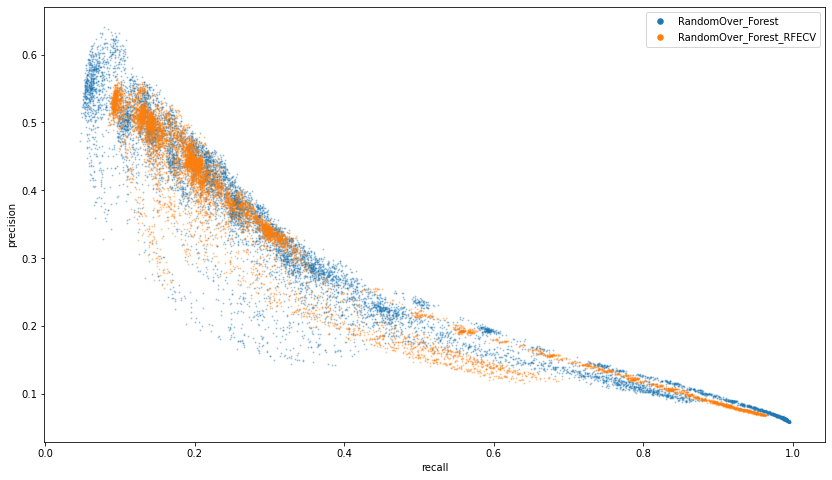

In [70]:
graph_2scores_CV_comp([dr3, dr4], 'recall', 'precision', s=[1, 1], alpha=0.3, pdf=pdf)

Export PDF : output/model_decision_tree/33.pdf



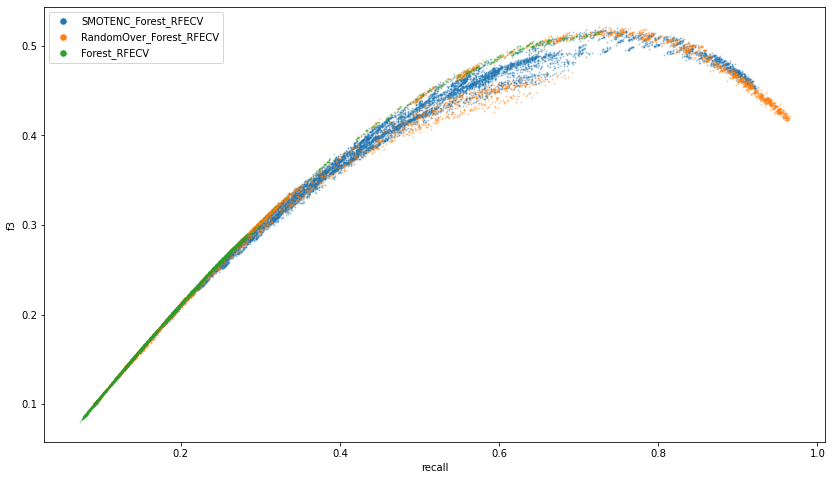

In [71]:
graph_2scores_CV_comp([dr5, dr4, dr2], 'recall', 'f3', s=[1, 1, 1], alpha=0.3, pdf=pdf)

Export PDF : output/model_decision_tree/34.pdf



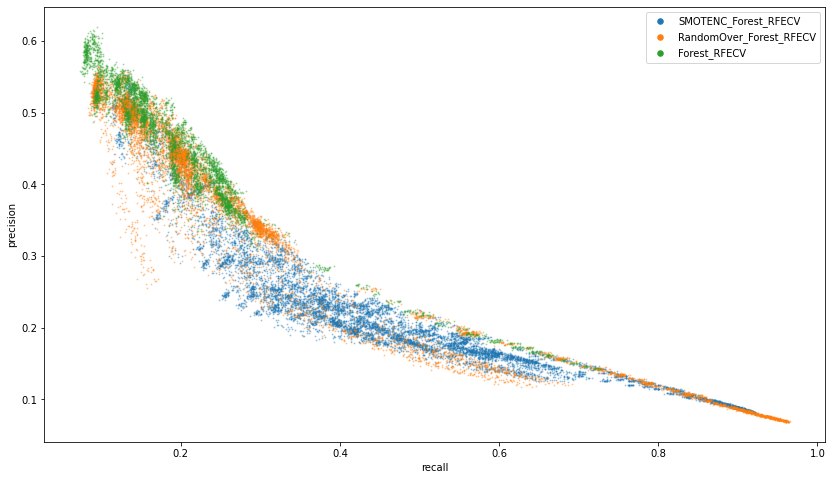

In [72]:
graph_2scores_CV_comp([dr5, dr4, dr2], 'recall', 'precision', s=[1, 1, 1], alpha=0.3, pdf=pdf)

In [73]:
scores_df = pd.DataFrame(SCORES).set_index('model_name')
a = scores_df.columns.tolist()
a.remove('training_time')
a.remove('prediction_time')
scores_df.sort_values(by='f3', ascending=False).to_csv('backups/SCORES_Forest.csv')
scores_df.sort_values(by='f3', ascending=False).style.background_gradient(cmap='Blues', subset=a).background_gradient(cmap='Blues_r', subset=['training_time', 'prediction_time'])

,f1,f3,f5,recall,negative predictive value,precision,roc_auc,training_time,prediction_time
model_name,,,,,,,,,
Forest,0.202287,0.519119,0.683916,0.853199,0.985854,0.114747,0.825453,89.550514,1.036071
RandomOver_Forest,0.199797,0.517357,0.684811,0.858476,0.986152,0.113054,0.824934,123.845889,1.130908
Forest_RFECV,0.192779,0.509980,0.682834,0.866363,0.986398,0.108456,0.827155,67.214867,0.806621
RandomOver_Forest_RFECV,0.190473,0.508326,0.683906,0.872195,0.986763,0.106910,0.827376,97.605531,0.890550
SMOTENC_Forest_RFECV,0.184413,0.502890,0.684845,0.884970,0.987518,0.102931,0.825944,296.630673,0.773499


In [74]:
print(f"Temps d'exécution total : {time.strftime('%H:%M:%S', time.gmtime(time.time()-t))}")

Temps d'exécution total : 00:15:41
